## Analysis and Charges Prediction on Insurance dataset

In [73]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [74]:
#import the dataset
data = pd.read_csv("insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Exploring dataset

In [75]:
data.shape

(1338, 7)

In [76]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [77]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [78]:
data.smoker.value_counts(normalize = True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [79]:
data.region.value_counts(normalize = True)

southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [80]:
# Descriptive statistics
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data cleaning

In [81]:
# Null values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [82]:
#duplicates
data.duplicated().sum()

1

In [83]:
# Outliers
# Get the categorical and numerical variables
categorical_variables_df= data.select_dtypes(include=['object'])
numerical_variables_df= data.select_dtypes(exclude=['object'])


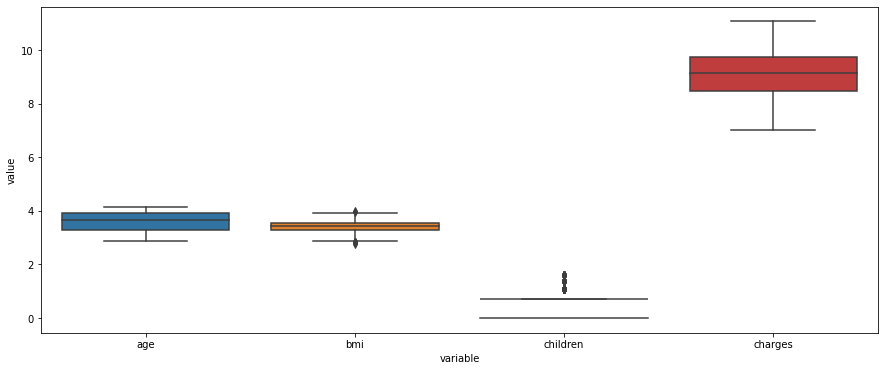

In [84]:
##Boxplots
for c in numerical_variables_df:
    numerical_variables_df[c] = np.log(numerical_variables_df[c])
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
df = pd.DataFrame(data = numerical_variables_df, columns = numerical_variables_df.columns)

sns.boxplot(x="variable", y="value",ax=ax, data=pd.melt(df))

plt.show()

The dataset is considerably clean, no missing values, only one duplicate and no lots of outliers.

#### Exploratory data analysis

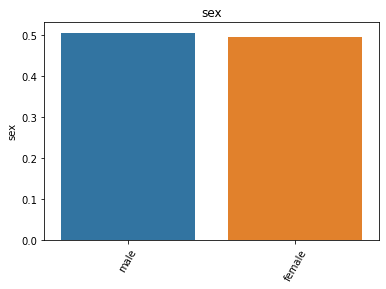

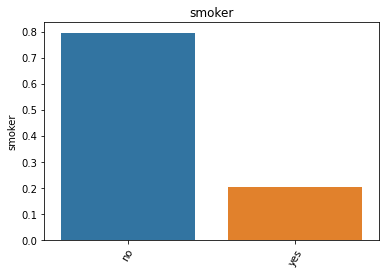

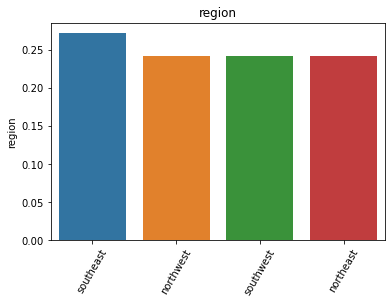

In [85]:
# Univariate analysis
def bar():
    fig =  plt.subplots()
    for feature in categorical_variables_df:
        cat = data[feature].value_counts(normalize=True) # this hould make the adjust the scoop of to the vie
        chart = sns.barplot(cat.index , cat)
        chart.set_xticklabels(chart.get_xticklabels() , rotation = 60)

        plt.title(feature)
        plt.show()
bar()

The proportion of male to females was almost half.
About 79% of the population umder study were non smokers
Most of the study population about 27.2% were from south East

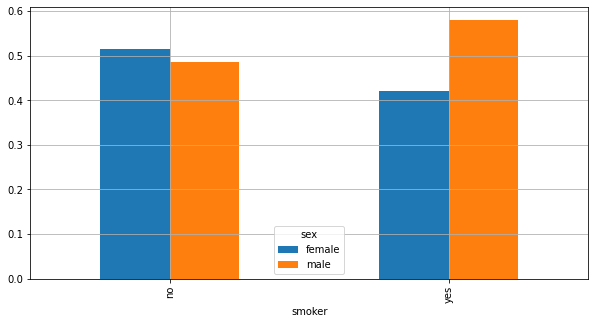

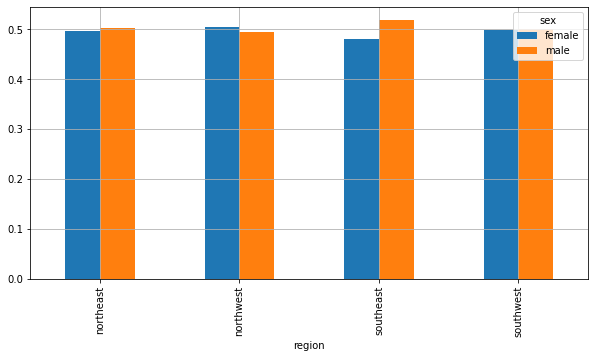

In [86]:
# Bivariate analyis
def stacked_bar():
    categorical_variables_df1 = categorical_variables_df.drop('sex',axis=1) 
    target = data.sex
    for feature in categorical_variables_df1:
        cross_tab = pd.crosstab(data[feature],target)
        cross_tab.div(cross_tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(10,5), grid= True)
        plt.show()
stacked_bar()

The number of smokers in the population is significantly higer in males than females.
Gender proportions from the regions of study were almost equal.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

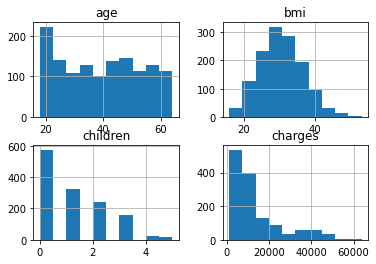

In [87]:
data.hist()

In [88]:
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Bmi has a normal distribution, while children and charges are skewed to the right.

#### Correlation

In [89]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [90]:
matrix=numerical_variables_df.corr()
matrix.round(2)

,age,bmi,children,charges
age,1.00,0.11,0.03,0.54
bmi,0.11,1.00,0.01,0.14
children,0.03,0.01,1.00,0.12
charges,0.54,0.14,0.12,1.00


<AxesSubplot:>

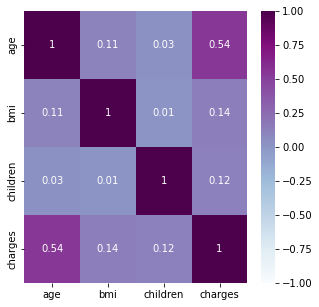

In [91]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(matrix.round(2), vmax=1, vmin=-1, cmap='BuPu',annot=True)

The variables, age, bmi and children have a weak positive correlation towards charges.

#### Linear Regression

In [92]:
import statsmodels.api as sm

In [93]:
predictors = data[['age','children','bmi']]
response = data.charges

mult_mod = sm.OLS(response, predictors)
mult_res = mult_mod.fit()
print(mult_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              655.7
Date:                Fri, 11 Mar 2022   Prob (F-statistic):                   6.52e-262
Time:                        11:19:05   Log-Likelihood:                         -14400.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1335   BIC:                                  2.882e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R-squared and Adj. R-squared of 59.6 and 59.5 shows the predictors are significantly sufficient for prediction of charges.

#### Machine Learning

In [94]:
# Import necessary libraries
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRFRegressor

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [95]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
def encode():
    le = LabelEncoder()

    for col in categorical_variables_df:
        data[col] = le.fit_transform(data[col].astype(str))
    print (data.info())
    
encode()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB
None


In [96]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Split data

In [97]:
X = data.drop(['charges'], 1)
y = data.charges

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 6), (1070,), (268, 6), (268,))

#### Training models

In [99]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

linear regression

In [100]:
LinReg = LinearRegression().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(LinReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(LinReg.score(X_test, y_test)))

R-squared of the training: 0.742
R-squared of the test: 0.783


In [101]:
charges_predicted = LinReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(charges_predicted, y_test))
MSE = mean_squared_error(charges_predicted, y_test)
MAE = mean_absolute_error(charges_predicted, y_test)
difference = np.abs(y_test-charges_predicted)
mape = np.mean(difference/y_test)*100



print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}%'.format(mape))

RMSE: 5799.587
MSE: 33635210.431
MAE: 4186.509
MAPE: 47.093%


Ridge regression

In [102]:
RidgeReg = Ridge().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(RidgeReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(RidgeReg.score(X_test, y_test)))

R-squared of the training: 0.742
R-squared of the test: 0.783


In [103]:
charges_predicted = RidgeReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(charges_predicted, y_test))
MSE = mean_squared_error(charges_predicted, y_test)
MAE = mean_absolute_error(charges_predicted, y_test)
difference = np.abs(y_test-charges_predicted)
mape = np.mean(difference/y_test)*100



print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 5803.085
MSE: 33675792.154
MAE: 4198.141
MAPE: 47.320


Lasso Regression

In [104]:
LassoReg = Lasso().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(LassoReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(LassoReg.score(X_test, y_test)))

R-squared of the training: 0.742
R-squared of the test: 0.783


In [105]:
charges_predicted = LassoReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(charges_predicted, y_test))
MSE = mean_squared_error(charges_predicted, y_test)
MAE = mean_absolute_error(charges_predicted, y_test)
difference = np.abs(y_test-charges_predicted)
mape = np.mean(difference/y_test)*100

print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 5799.943
MSE: 33639339.306
MAE: 4187.245
MAPE: 47.114


Decision Tree Regression

In [106]:
DTReg = DecisionTreeRegressor( criterion='mse', max_depth=10, random_state=100).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(DTReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(DTReg.score(X_test, y_test)))

R-squared of the training: 0.969
R-squared of the test: 0.746


In [107]:
charges_predicted = DTReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(charges_predicted, y_test))
MSE = mean_squared_error(charges_predicted, y_test)
MAE = mean_absolute_error(charges_predicted, y_test)
difference = np.abs(y_test-charges_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 6277.322
MSE: 39404773.425
MAE: 3044.175
MAPE: 37.267


Random Forest Regression

In [108]:
RFReg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=100).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(RFReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(RFReg.score(X_test, y_test)))

R-squared of the training: 0.976
R-squared of the test: 0.862


In [109]:
charges_predicted = RFReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(charges_predicted, y_test))
MSE = mean_squared_error(charges_predicted, y_test)
MAE = mean_absolute_error(charges_predicted, y_test)
difference = np.abs(y_test-charges_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))


RMSE: 4621.073
MSE: 21354320.148
MAE: 2486.305
MAPE: 28.402


Bagging Regression

In [110]:
BReg = BaggingRegressor(base_estimator=None, n_estimators=100,max_features=1.0,random_state=100).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(BReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(BReg.score(X_test, y_test)))

R-squared of the training: 0.976
R-squared of the test: 0.862


In [111]:
charges_predicted = BReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(charges_predicted, y_test))
MSE = mean_squared_error(charges_predicted, y_test)
MAE = mean_absolute_error(charges_predicted, y_test)
difference = np.abs(y_test-charges_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 4627.954
MSE: 21417954.032
MAE: 2469.659
MAPE: 27.988


Adaboost regression

In [112]:
AReg = AdaBoostRegressor(base_estimator=None,n_estimators=500,learning_rate=1.0,loss='linear',random_state=100,).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(AReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(AReg.score(X_test, y_test)))

R-squared of the training: 0.827
R-squared of the test: 0.826


In [113]:
charges_predicted = AReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(charges_predicted, y_test))
MSE = mean_squared_error(charges_predicted, y_test)
MAE = mean_absolute_error(charges_predicted, y_test)
difference = np.abs(y_test-charges_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 5198.046
MSE: 27019686.542
MAE: 4192.180
MAPE: 72.991


Gradient Boost Regression

In [114]:
GBReg = GradientBoostingRegressor(n_estimators=1000, max_depth=20, random_state=1000).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(GBReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(GBReg.score(X_test, y_test)))

R-squared of the training: 0.998
R-squared of the test: 0.728


In [115]:
charges_predicted = GBReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(charges_predicted, y_test))
MSE = mean_squared_error(charges_predicted, y_test)
MAE = mean_absolute_error(charges_predicted, y_test)
difference = np.abs(y_test-charges_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 6497.403
MSE: 42216250.322
MAE: 2990.356
MAPE: 32.676


XGB Regression

In [116]:
XGBReg = XGBRFRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(XGBReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(XGBReg.score(X_test, y_test)))

R-squared of the training: 0.902
R-squared of the test: 0.876


In [117]:
charges_predicted = XGBReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(charges_predicted, y_test))
MSE = mean_squared_error(charges_predicted, y_test)
MAE = mean_absolute_error(charges_predicted, y_test)
difference = np.abs(y_test-charges_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 4385.602
MSE: 19233507.759
MAE: 2484.171
MAPE: 31.310


### Tensorflow

In [118]:
import tensorflow as tf

In [119]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 8638.9453 - mae: 8638.9453
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7889.0103 - mae: 7889.0103
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7535.4185 - mae: 7535.4185
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 7741.7231 - mae: 7741.7231
Epoch 5/100
34/34 [==============================] - 0s 8ms/step - loss: 7719.7183 - mae: 7719.7183
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 7680.7900 - mae: 7680.7900
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7577.4663 - mae: 7577.4663
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7838.6870 - mae: 7838.6870
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7592.2783 - mae: 7592.2783
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7777.2466 - mae: 7777.2466

34/34 [==============================] - 0s 4ms/step - loss: 7503.3335 - mae: 7503.3335
Epoch 83/100
34/34 [==============================] - 0s 5ms/step - loss: 7711.2227 - mae: 7711.2227
Epoch 84/100
34/34 [==============================] - 0s 6ms/step - loss: 7435.7261 - mae: 7435.7261
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 7726.8018 - mae: 7726.8018
Epoch 86/100
34/34 [==============================] - 0s 7ms/step - loss: 7469.9639 - mae: 7469.9639
Epoch 87/100
34/34 [==============================] - 0s 5ms/step - loss: 7383.7065 - mae: 7383.7065
Epoch 88/100
34/34 [==============================] - 0s 5ms/step - loss: 7334.7222 - mae: 7334.7222
Epoch 89/100
34/34 [==============================] - 0s 7ms/step - loss: 7491.4268 - mae: 7491.4268
Epoch 90/100
34/34 [==============================] - 0s 7ms/step - loss: 7473.0684 - mae: 7473.0684
Epoch 91/100
34/34 [==============================] - 0s 7ms/step - loss: 7318.5186 - mae: 7318.5186
Epo

In [120]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 8967.5273 - mae: 8967.5273


[8967.52734375, 8967.52734375]

Model didnt do so well

In [121]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=1000, verbose=0)

In [122]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3242.7422 - mae: 3242.7422


[3242.7421875, 3242.7421875]

Gives a better result after running the model longer

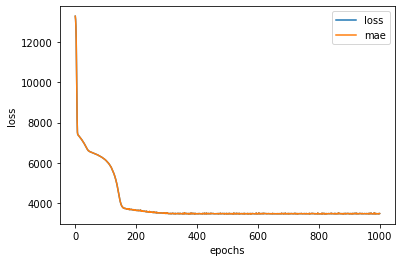

In [123]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [124]:
#now lets add another layer
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000), # 1000 units
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=1000, verbose=0)

In [125]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3166.2891 - mae: 3166.2891


[3166.2890625, 3166.2890625]

#### Normalization and standardizing to try improve the model

In [126]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex","smoker","region"])
)

# Create X & y 
X = data.drop("charges", axis = 1)
y = data["charges"]

#Build out train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training amd test data with normalisation (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [127]:
# what does our data look like now
X_train.loc[0]

age         19.0
sex          0.0
bmi         27.9
children     0.0
smoker       1.0
region       3.0
Name: 0, dtype: float64

In [128]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [129]:
X_train_normal[76]

array([0.        , 0.38081786, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [130]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [131]:
# check the shapes
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

data has been normalised and one hot encoded. Now lets build a neural model and see how it goes

In [132]:
# Buikd our model to fit our normalised data

# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),  
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model 
insurance_model_4.fit(X_train_normal, y_train, epochs=1000, verbose = 0) 

In [133]:
# Evaluate our model trained on normalised data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3174.8044 - mae: 3174.8044


[3174.804443359375, 3174.804443359375]